Intersections occur at x-values: [0.7649508331928079, 3.9230042723657457, 7.083632845821108]


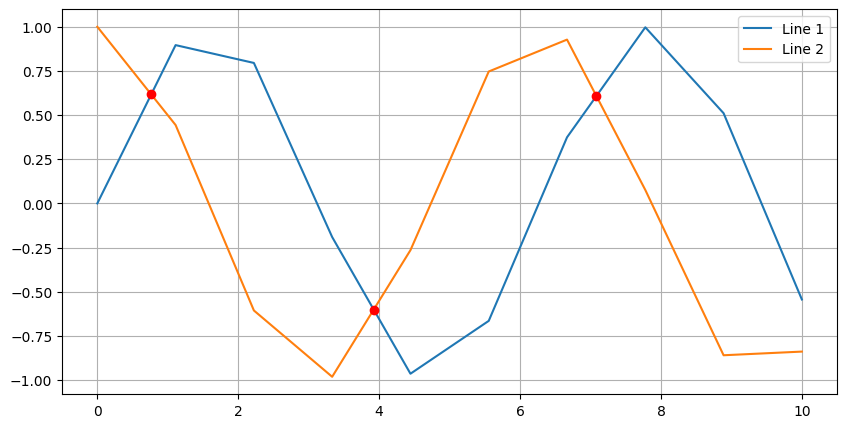

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Generate sample data
x = np.linspace(0, 10, 10)
y1 = np.sin(x)
y2 = np.cos(x)

# Create the plot
plt.figure(figsize=(10, 5))
plt.plot(x, y1, label="Line 1")
plt.plot(x, y2, label="Line 2")


# Function to find intersections
def find_intersections(x, y1, y2):
    intersections = []
    for i in range(len(x) - 1):
        if (y1[i] - y2[i]) * (y1[i + 1] - y2[i + 1]) < 0:
            # Calculate the exact x of intersection
            x_intersect = x[i] - (y1[i] - y2[i]) * (x[i + 1] - x[i]) / (
                y1[i + 1] - y2[i + 1] - y1[i] + y2[i]
            )
            intersections.append(x_intersect)
            # Plot the intersection
            plt.plot(
                x_intersect, np.interp(x_intersect, x, y1), "ro"
            )  # 'ro' for red circle
    return intersections


# Find and plot intersections
intersections = find_intersections(x, y1, y2)
print("Intersections occur at x-values:", intersections)

# Finalizing the plot
plt.legend()
plt.grid(True)
plt.show()

Intersections occur at x-values: [3.3331082425021377, 6.126395625972132, 7.47418895233663, 8.044816272871714]


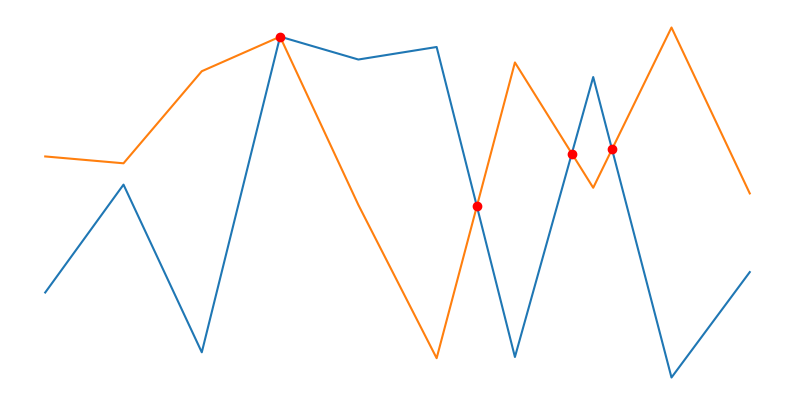

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Generate sample data
x = np.linspace(0, 10, 10)
y1 = np.random.rand(10)  # Random data for Line 1
y2 = np.random.rand(10)  # Random data for Line 2

# Create the plot
plt.figure(figsize=(10, 5))
plt.plot(x, y1, label="Line 1")
plt.plot(x, y2, label="Line 2")


# Function to find intersections
def find_intersections(x, y1, y2):
    intersections = []
    for i in range(len(x) - 1):
        if (y1[i] - y2[i]) * (y1[i + 1] - y2[i + 1]) < 0:
            # Calculate the exact x of intersection
            x_intersect = x[i] - (y1[i] - y2[i]) * (x[i + 1] - x[i]) / (
                y1[i + 1] - y2[i + 1] - y1[i] + y2[i]
            )
            intersections.append(x_intersect)
            # Plot the intersection
            plt.plot(
                x_intersect, np.interp(x_intersect, x, y1), "ro"
            )  # 'ro' for red circle
    return intersections


# Find and plot intersections
intersections = find_intersections(x, y1, y2)
print("Intersections occur at x-values:", intersections)

# Customize the plot
plt.axis("off")  # Remove axes
plt.grid(False)  # Remove grid
plt.gca().set_facecolor("white")  # Set background to white
plt.show()

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import google.generativeai as genai
import os
import time

# Configure API
GOOGLE_API_KEY = os.environ.get("GOOGLE_API_KEY")
genai.configure(api_key=GOOGLE_API_KEY)

safety_settings = [
    {"category": "HARM_CATEGORY_HARASSMENT", "threshold": "BLOCK_NONE"},
    {"category": "HARM_CATEGORY_HATE_SPEECH", "threshold": "BLOCK_NONE"},
    {"category": "HARM_CATEGORY_SEXUALLY_EXPLICIT", "threshold": "BLOCK_NONE"},
    {"category": "HARM_CATEGORY_DANGEROUS_CONTENT", "threshold": "BLOCK_NONE"},
]

generation_config = {
    "temperature": 1,
    "top_p": 0.95,
    "top_k": 64,
    "max_output_tokens": 8192,
    "response_mime_type": "text/plain",
}

# Generate sample data
x = np.linspace(0, 10, 10)
y1 = np.random.rand(10)  # Random data for Line 1
y2 = np.random.rand(10)  # Random data for Line 2

# Create the plot
plt.figure(figsize=(10, 5))
plt.plot(x, y1, label="Line 1")
plt.plot(x, y2, label="Line 2")
plt.axis("off")  # Remove axes
plt.grid(False)  # Remove grid
plt.gca().set_facecolor("white")  # Set background to white
image_path = "intersection_image.png"
plt.savefig(image_path)  # Save the figure
plt.close()

# Upload the image to Gemini
print("Uploading file...")
image_file = genai.upload_file(path=image_path)
print(f"Completed upload: {image_file.uri}")

# Set prompt for the model
prompt = "Count the number of intersections in this image."

model = genai.GenerativeModel(
    model_name="gemini-1.5-pro-latest",
    safety_settings=safety_settings,
    generation_config=generation_config,
)

print("Making LLM inference request...")
response = model.generate_content(
    [prompt, image_file], request_options={"timeout": 600}
)

# Check if the response is valid
if not response.parts:
    print(
        "No content was generated. Check the `response.prompt_feedback` for more details."
    )
else:
    print(response.text)

# Clean up by deleting the uploaded file
genai.delete_file(image_file.name)
print(f"Deleted file {image_file.uri}")

Uploading file...
Completed upload: https://generativelanguage.googleapis.com/v1beta/files/axy5h5squuhx
Making LLM inference request...
There are **7** intersections in the image. 

Deleted file https://generativelanguage.googleapis.com/v1beta/files/axy5h5squuhx


Uploading file...
Completed upload: https://generativelanguage.googleapis.com/v1beta/files/rplryam5o3wa
Making LLM inference request...
There are **6** intersections. 

Deleted file https://generativelanguage.googleapis.com/v1beta/files/rplryam5o3wa


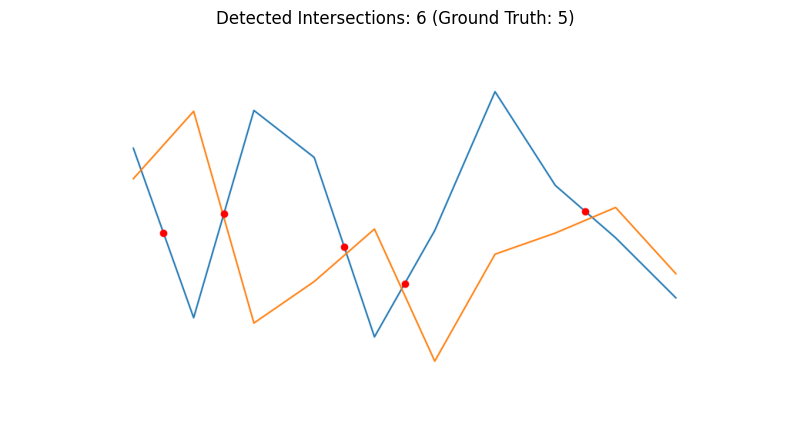

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import google.generativeai as genai
import os
import re


safety_settings = [
    {"category": "HARM_CATEGORY_HARASSMENT", "threshold": "BLOCK_NONE"},
    {"category": "HARM_CATEGORY_HATE_SPEECH", "threshold": "BLOCK_NONE"},
    {"category": "HARM_CATEGORY_SEXUALLY_EXPLICIT", "threshold": "BLOCK_NONE"},
    {"category": "HARM_CATEGORY_DANGEROUS_CONTENT", "threshold": "BLOCK_NONE"},
]

generation_config = {
    "temperature": 1,
    "top_p": 0.95,
    "top_k": 64,
    "max_output_tokens": 8192 * 2,
    "response_mime_type": "text/plain",
}

# Generate sample data
x = np.linspace(0, 10, 10)
y1 = np.random.rand(10)  # Random data for Line 1
y2 = np.random.rand(10)  # Random data for Line 2


# Function to find intersections
def find_intersections(x, y1, y2):
    intersections = []
    for i in range(len(x) - 1):
        if (y1[i] - y2[i]) * (y1[i + 1] - y2[i + 1]) < 0:
            intersections.append(
                (x[i] + x[i + 1]) / 2
            )  # Approximate x-coordinate of intersection
    return intersections


intersections = find_intersections(x, y1, y2)
ground_truth_count = len(intersections)

# Create the plot
plt.figure(figsize=(10, 5))
plt.plot(x, y1, label="Line 1")
plt.plot(x, y2, label="Line 2")
for xi in intersections:
    plt.plot(xi, np.interp(xi, x, y1), "ro")  # Mark intersections
plt.axis("off")  # Remove axes
plt.grid(False)  # Remove grid
plt.gca().set_facecolor("white")  # Set background to white
image_path = "intersection_image.png"
plt.savefig(image_path)  # Save the figure
plt.close()

# Upload the image to Gemini
print("Uploading file...")
image_file = genai.upload_file(path=image_path)
print(f"Completed upload: {image_file.uri}")

# Set prompt for the model
prompt = "Count the number of intersections in this image and give an integer answer."

model = genai.GenerativeModel(
    model_name="gemini-1.5-pro-latest",
    safety_settings=safety_settings,
    generation_config=generation_config,
)

print("Making LLM inference request...")
response = model.generate_content(
    [prompt, image_file], request_options={"timeout": 600}
)

# Extract the number of intersections from the response
if not response.parts:
    print(
        "No content was generated. Check the `response.prompt_feedback` for more details."
    )
else:
    response_text = response.text
    print(response_text)
    # Extract number from response
    match = re.search(r"\*\*(\d+)\*\*", response_text)
    if match:
        gemini_count = int(match.group(1))
    else:
        gemini_count = None

# Clean up by deleting the uploaded file
genai.delete_file(image_file.name)
print(f"Deleted file {image_file.uri}")

# Display the image and the response
img = plt.imread(image_path)
plt.figure(figsize=(10, 5))
plt.imshow(img)
plt.axis("off")
if gemini_count is not None:
    plt.title(
        f"Detected Intersections: {gemini_count} (Ground Truth: {ground_truth_count})"
    )
else:
    plt.title("Failed to detect intersections correctly.")
plt.show()

In [16]:
import ipywidgets as widgets
from IPython.display import display

# Slider to control the length of the lines
line_length_slider = widgets.IntSlider(
    value=10, min=5, max=20, step=1, description="Line Length:", continuous_update=False
)

# Button to send data to Gemini
send_button = widgets.Button(
    description="Send to Gemini",
    button_style="success",  # 'success', 'info', 'warning', 'danger' or ''
    tooltip="Click to send the data to Gemini",
)

# Output widget to display results
output = widgets.Output()


def on_button_clicked(b):
    with output:
        output.clear_output()
        # Generate sample data based on slider value
        x = np.linspace(0, 10, line_length_slider.value)
        y1 = np.random.rand(line_length_slider.value)
        y2 = np.random.rand(line_length_slider.value)

        # Find intersections
        intersections = find_intersections(x, y1, y2)
        ground_truth_count = len(intersections)

        # Plotting
        plt.figure(figsize=(10, 5))
        plt.plot(x, y1, "b-", label="Line 1")
        plt.plot(x, y2, "g-", label="Line 2")
        for xi in intersections:
            plt.plot(xi, np.interp(xi, x, y1), "ro")
        plt.axis("off")
        plt.grid(False)
        plt.gca().set_facecolor("white")
        plt.legend()
        plt.show()

        # Upload and send to Gemini
        plt.savefig(image_path)
        plt.close()
        print("Uploading file...")
        image_file = genai.upload_file(path=image_path)
        print(f"Completed upload: {image_file.uri}")

        # Gemini API call
        print("Making LLM inference request...")
        response = model.generate_content(
            [prompt, image_file], request_options={"timeout": 600}
        )

        # Display response
        if not response.parts:
            print(
                "No content was generated. Check the `response.prompt_feedback` for more details."
            )
        else:
            response_text = response.text
            print(response_text)
            match = re.search(r"\*\*(\d+)\*\*", response_text)
            if match:
                gemini_count = int(match.group(1))
                plt.title(
                    f"Detected Intersections: {gemini_count} (Ground Truth: {ground_truth_count})"
                )
            else:
                plt.title("Failed to detect intersections correctly.")
            plt.imshow(plt.imread(image_path))
            plt.axis("off")
            plt.show()

        # Clean up
        genai.delete_file(image_file.name)
        print(f"Deleted file {image_file.uri}")


send_button.on_click(on_button_clicked)

# Display widgets
display(line_length_slider, send_button, output)

IntSlider(value=10, continuous_update=False, description='Line Length:', max=20, min=5)

Button(button_style='success', description='Send to Gemini', style=ButtonStyle(), tooltip='Click to send the d…

Output()

In [17]:
import ipywidgets as widgets
from IPython.display import display, clear_output

# Slider to control the length of the lines
line_length_slider = widgets.IntSlider(
    value=10, min=5, max=20, step=1, description="Line Length:", continuous_update=False
)

# Checkbox to show or hide intersections
show_intersections_checkbox = widgets.Checkbox(
    value=True, description="Show Intersections", disabled=False
)

# Button to send data to Gemini
send_button = widgets.Button(
    description="Send to Gemini",
    button_style="success",  # 'success', 'info', 'warning', 'danger' or ''
    tooltip="Click to send the data to Gemini",
)

# Output widget to display results
output = widgets.Output()


def on_button_clicked(b):
    with output:
        clear_output(wait=True)
        # Generate sample data based on slider value
        x = np.linspace(0, 10, line_length_slider.value)
        y1 = np.random.rand(line_length_slider.value)
        y2 = np.random.rand(line_length_slider.value)

        # Find intersections
        intersections = find_intersections(x, y1, y2)
        ground_truth_count = len(intersections)

        # Plotting
        fig, ax = plt.subplots(figsize=(10, 5))
        ax.plot(x, y1, "b-", label="Line 1")
        ax.plot(x, y2, "g-", label="Line 2")
        if show_intersections_checkbox.value:
            for xi in intersections:
                ax.plot(xi, np.interp(xi, x, y1), "ro")
        ax.axis("off")
        ax.grid(False)
        ax.set_facecolor("white")

        # Save the figure
        plt.savefig(image_path, bbox_inches="tight", pad_inches=0)
        plt.close(fig)

        print("Uploading file...")
        image_file = genai.upload_file(path=image_path)
        print(f"Completed upload: {image_file.uri}")

        # Gemini API call
        print("Making LLM inference request...")
        response = model.generate_content(
            [prompt, image_file], request_options={"timeout": 600}
        )

        # Display response
        if not response.parts:
            print(
                "No content was generated. Check the `response.prompt_feedback` for more details."
            )
        else:
            response_text = response.text
            print(response_text)
            match = re.search(r"\*\*(\d+)\*\*", response_text)
            if match:
                gemini_count = int(match.group(1))
                plt.title(
                    f"Detected Intersections: {gemini_count} (Ground Truth: {ground_truth_count})"
                )
            else:
                plt.title("Failed to detect intersections correctly.")
            img = plt.imread(image_path)
            plt.imshow(img)
            plt.axis("off")
            plt.show()

        # Clean up
        genai.delete_file(image_file.name)
        print(f"Deleted file {image_file.uri}")


send_button.on_click(on_button_clicked)

# Display widgets
display(line_length_slider, show_intersections_checkbox, send_button, output)

IntSlider(value=10, continuous_update=False, description='Line Length:', max=20, min=5)

Checkbox(value=True, description='Show Intersections')

Button(button_style='success', description='Send to Gemini', style=ButtonStyle(), tooltip='Click to send the d…

Output()

In [20]:
import ipywidgets as widgets
from IPython.display import display, clear_output

# Slider to control the length of the lines
line_length_slider = widgets.IntSlider(
    value=10, min=2, max=20, step=1, description="Line Length:", continuous_update=False
)

# Checkbox to show or hide intersections
show_intersections_checkbox = widgets.Checkbox(
    value=True, description="Show Intersections", disabled=False
)

# Button to send data to Gemini
send_button = widgets.Button(
    description="Send to Gemini",
    button_style="success",  # 'success', 'info', 'warning', 'danger' or ''
    tooltip="Click to send the data to Gemini",
)

# Output widget to display results
output = widgets.Output()


def update_plot():
    with output:
        clear_output(wait=True)
        # Generate sample data based on slider value
        x = np.linspace(0, 10, line_length_slider.value)
        y1 = np.random.rand(line_length_slider.value)
        y2 = np.random.rand(line_length_slider.value)

        # Find intersections
        intersections = find_intersections(x, y1, y2)

        # Plotting
        fig, ax = plt.subplots(figsize=(10, 5))
        ax.plot(x, y1, "b-", label="Line 1")
        ax.plot(x, y2, "g-", label="Line 2")
        if show_intersections_checkbox.value:
            for xi in intersections:
                ax.plot(xi, np.interp(xi, x, y1), "ro")
        ax.axis("off")
        ax.grid(False)
        ax.set_facecolor("white")
        plt.show()


def on_button_clicked(b):
    with output:
        # Save the current figure
        plt.savefig(image_path, bbox_inches="tight", pad_inches=0)
        plt.close()

        print("Uploading file...")
        image_file = genai.upload_file(path=image_path)
        print(f"Completed upload: {image_file.uri}")

        # Gemini API call
        print("Making LLM inference request...")
        response = model.generate_content(
            [prompt, image_file], request_options={"timeout": 600}
        )

        # Display response
        if not response.parts:
            print(
                "No content was generated. Check the `response.prompt_feedback` for more details."
            )
        else:
            response_text = response.text
            print(response_text)

        # Clean up
        genai.delete_file(image_file.name)
        print(f"Deleted file {image_file.uri}")


# Bind the slider and checkbox to update the plot interactively
line_length_slider.observe(lambda change: update_plot(), names="value")
show_intersections_checkbox.observe(lambda change: update_plot(), names="value")

send_button.on_click(on_button_clicked)

# Display widgets and initial plot
display(line_length_slider, show_intersections_checkbox, send_button, output)
update_plot()  # Initial plot display

IntSlider(value=10, continuous_update=False, description='Line Length:', max=20, min=2)

Checkbox(value=True, description='Show Intersections')

Button(button_style='success', description='Send to Gemini', style=ButtonStyle(), tooltip='Click to send the d…

Output()

In [21]:
import ipywidgets as widgets
from IPython.display import display, clear_output

# Slider to control the length of the lines
line_length_slider = widgets.IntSlider(
    value=10, min=5, max=20, step=1, description="Line Length:", continuous_update=False
)

# Checkbox to show or hide intersections
show_intersections_checkbox = widgets.Checkbox(
    value=True, description="Show Intersections", disabled=False
)

# Button to send data to Gemini
send_button = widgets.Button(
    description="Send to Gemini",
    button_style="success",  # 'success', 'info', 'warning', 'danger' or ''
    tooltip="Click to send the data to Gemini",
)

# Output widget to display results
output = widgets.Output()


def update_plot():
    with output:
        clear_output(wait=True)
        # Generate sample data based on slider value
        x = np.linspace(0, 10, line_length_slider.value)
        y1 = np.random.rand(line_length_slider.value)
        y2 = np.random.rand(line_length_slider.value)

        # Find intersections
        intersections = find_intersections(x, y1, y2)

        # Plotting
        fig, ax = plt.subplots(figsize=(10, 5))
        ax.plot(x, y1, "b-", label="Line 1")
        ax.plot(x, y2, "g-", label="Line 2")
        if show_intersections_checkbox.value:
            for xi in intersections:
                ax.plot(xi, np.interp(xi, x, y1), "ro")
        ax.axis("off")
        ax.grid(False)
        ax.set_facecolor("white")
        plt.savefig(
            image_path, bbox_inches="tight", pad_inches=0
        )  # Save before closing
        plt.show()


def on_button_clicked(b):
    with output:
        # Replot and save the image to ensure it's up-to-date
        update_plot()  # Ensure the plot is updated and saved
        print("Uploading file...")
        image_file = genai.upload_file(path=image_path)
        print(f"Completed upload: {image_file.uri}")

        # Gemini API call
        print("Making LLM inference request...")
        response = model.generate_content(
            [prompt, image_file], request_options={"timeout": 600}
        )

        # Display response
        if not response.parts:
            print(
                "No content was generated. Check the `response.prompt_feedback` for more details."
            )
        else:
            response_text = response.text
            print(response_text)

        # Clean up
        genai.delete_file(image_file.name)
        print(f"Deleted file {image_file.uri}")


# Bind the slider and checkbox to update the plot interactively
line_length_slider.observe(lambda change: update_plot(), names="value")
show_intersections_checkbox.observe(lambda change: update_plot(), names="value")

send_button.on_click(on_button_clicked)

# Display widgets and initial plot
display(line_length_slider, show_intersections_checkbox, send_button, output)
update_plot()  # Initial plot display

IntSlider(value=10, continuous_update=False, description='Line Length:', max=20, min=5)

Checkbox(value=True, description='Show Intersections')

Button(button_style='success', description='Send to Gemini', style=ButtonStyle(), tooltip='Click to send the d…

Output()

In [24]:
import ipywidgets as widgets
from IPython.display import display, clear_output

# Slider to control the length of the lines
line_length_slider = widgets.IntSlider(
    value=10, min=2, max=10, step=1, description="Line Length:", continuous_update=False
)

# Checkbox to show or hide intersections
show_intersections_checkbox = widgets.Checkbox(
    value=False, description="Show Intersections", disabled=False
)

# Button to send data to Gemini
send_button = widgets.Button(
    description="Send to Gemini",
    button_style="success",  # 'success', 'info', 'warning', 'danger' or ''
    tooltip="Click to send the data to Gemini",
)

# Output widget to display results
output = widgets.Output()


def update_plot():
    with output:
        clear_output(wait=True)
        # Generate sample data based on slider value
        x = np.linspace(0, 10, line_length_slider.value)
        y1 = np.random.rand(line_length_slider.value)
        y2 = np.random.rand(line_length_slider.value)

        # Find intersections
        intersections = find_intersections(x, y1, y2)

        # Plotting
        fig, ax = plt.subplots(figsize=(10, 5))
        ax.plot(x, y1, "b-", label="Line 1")
        ax.plot(x, y2, "g-", label="Line 2")
        if show_intersections_checkbox.value:
            for xi in intersections:
                ax.plot(xi, np.interp(xi, x, y1), "ro")
        ax.axis("off")
        ax.grid(False)
        ax.set_facecolor("white")
        plt.savefig(
            image_path, bbox_inches="tight", pad_inches=0
        )  # Save before closing
        plt.show()


def on_button_clicked(b):
    with output:
        print("Uploading file...")
        image_file = genai.upload_file(path=image_path)
        print(f"Completed upload: {image_file.uri}")

        # Gemini API call
        print("Making LLM inference request...")
        response = model.generate_content(
            [prompt, image_file], request_options={"timeout": 600}
        )

        # Display response
        if not response.parts:
            print(
                "No content was generated. Check the `response.prompt_feedback` for more details."
            )
        else:
            response_text = response.text
            print(response_text)

        # Clean up
        genai.delete_file(image_file.name)
        print(f"Deleted file {image_file.uri}")


# Bind the slider and checkbox to update the plot interactively
line_length_slider.observe(lambda change: update_plot(), names="value")
show_intersections_checkbox.observe(lambda change: update_plot(), names="value")

send_button.on_click(on_button_clicked)

# Display widgets and initial plot
display(line_length_slider, show_intersections_checkbox, send_button, output)
update_plot()  # Initial plot display

IntSlider(value=10, continuous_update=False, description='Line Length:', max=10, min=2)

Checkbox(value=False, description='Show Intersections')

Button(button_style='success', description='Send to Gemini', style=ButtonStyle(), tooltip='Click to send the d…

Output()

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import os


def generate_and_save_images(
    num_images=10, num_segments=3, save_dir="./generated_images"
):
    # Ensure the directory exists
    os.makedirs(save_dir, exist_ok=True)

    # Generate and save the images
    for i in range(num_images):
        plt.figure(figsize=(10, 5))
        for _ in range(num_segments):
            x = np.linspace(0, 10, 100)
            y = np.random.rand(100) * 10  # Random y values scaled up
            plt.plot(x, y)

        # Save the plot
        file_path = os.path.join(save_dir, f"image_{i}.png")
        plt.savefig(file_path)
        plt.close()  # Close the figure to free memory


# Call the function to generate and save images
generate_and_save_images()

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import os


def generate_and_save_images(
    num_images=10, num_segments=3, save_dir="./generated_images"
):
    # Ensure the directory exists
    os.makedirs(save_dir, exist_ok=True)

    # Generate and save the images
    for i in range(num_images):
        plt.figure(figsize=(10, 5))
        for _ in range(num_segments):
            # Generate points for each segment
            x = np.linspace(0, 10, 10)  # 10 points from 0 to 10
            y = np.random.rand(10) * 10  # Random y values scaled up
            plt.plot(x, y, marker="o")  # Plot each segment with markers

        # Save the plot
        file_path = os.path.join(save_dir, f"image_{i}.png")
        plt.savefig(file_path)
        plt.close()  # Close the figure to free memory


# Call the function to generate and save images
generate_and_save_images()

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import os


def generate_and_save_images(
    num_images=10, num_points=3, save_dir="./generated_images"
):
    # Ensure the directory exists
    os.makedirs(save_dir, exist_ok=True)

    # Generate and save the images
    for i in range(num_images):
        plt.figure(figsize=(10, 5))
        x = np.linspace(0, 10, num_points)  # Only 3 points on the x-axis
        for _ in range(2):  # Three line segments
            y = np.random.rand(num_points) * 10  # Random y values scaled up
            plt.plot(x, y, marker="o")  # Plot with markers at points

        # Remove grid and axis
        plt.axis("off")

        # Save the plot
        file_path = os.path.join(save_dir, f"image_{i}.png")
        plt.savefig(file_path)
        plt.close()  # Close the figure to free memory


# Call the function to generate and save images
generate_and_save_images()

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import os
import json


def find_intersections(x, y1, y2):
    intersections = []
    for i in range(len(x) - 1):
        if (y1[i] - y2[i]) * (y1[i + 1] - y2[i + 1]) < 0:
            intersections.append(
                (x[i] + x[i + 1]) / 2
            )  # Approximate x-coordinate of intersection
    return len(intersections)


def generate_and_save_images(
    num_images=10, num_points=100, save_dir="./generated_images"
):
    # Ensure the directory exists
    os.makedirs(save_dir, exist_ok=True)

    # Configuration dictionary
    config = {}

    # Generate and save the images
    for i in range(num_images):
        plt.figure(figsize=(10, 5))
        x = np.linspace(0, 10, num_points)
        y1 = np.random.rand(num_points) * 10
        y2 = np.random.rand(num_points) * 10
        plt.plot(x, y1)
        plt.plot(x, y2)

        # Count intersections
        num_intersections = find_intersections(x, y1, y2)

        # Remove grid and axis
        plt.axis("off")

        # Save the plot
        image_name = f"image_{i}.png"
        file_path = os.path.join(save_dir, image_name)
        plt.savefig(file_path)
        plt.close()  # Close the figure to free memory

        # Store configuration
        config[image_name] = {
            "num_points": num_points,
            "num_intersections": num_intersections,
        }

    # Save configuration to JSON
    with open(os.path.join(save_dir, "config.json"), "w") as f:
        json.dump(config, f, indent=4)


# Call the function to generate and save images
generate_and_save_images()

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import os
import json


def find_intersections(x, y1, y2):
    intersections = []
    for i in range(len(x) - 1):
        if (y1[i] - y2[i]) * (y1[i + 1] - y2[i + 1]) < 0:
            intersections.append(
                (x[i] + x[i + 1]) / 2
            )  # Approximate x-coordinate of intersection
    return len(intersections)


def generate_and_save_images(
    num_images=10, num_points=3, save_dir="./generated_images"
):
    # Ensure the directory exists
    os.makedirs(save_dir, exist_ok=True)

    # Configuration dictionary
    config = {}

    # Generate and save the images
    for i in range(num_images):
        plt.figure(figsize=(10, 5))
        x = np.linspace(0, 10, num_points)
        y1 = np.random.rand(num_points) * 10
        y2 = np.random.rand(num_points) * 10
        plt.plot(x, y1)
        plt.plot(x, y2)

        # Count intersections
        num_intersections = find_intersections(x, y1, y2)

        # Remove grid and axis
        plt.axis("off")

        # Save the plot
        image_name = f"image_{i}.png"
        file_path = os.path.join(save_dir, image_name)
        plt.savefig(file_path)
        plt.close()  # Close the figure to free memory

        # Store configuration
        config[image_name] = {
            "num_points": num_points,
            "num_intersections": num_intersections,
        }

    # Save configuration to JSON
    with open(os.path.join(save_dir, "config.json"), "w") as f:
        json.dump(config, f, indent=4)


# Call the function to generate and save images
generate_and_save_images()

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import os
import json


def find_intersections(x, y1, y2):
    intersections = []
    for i in range(len(x) - 1):
        if (y1[i] - y2[i]) * (y1[i + 1] - y2[i + 1]) < 0:
            intersections.append(
                (x[i] + x[i + 1]) / 2
            )  # Approximate x-coordinate of intersection
    return len(intersections)


def generate_and_save_images(
    num_images=50, num_points=3, save_dir="./generated_images"
):
    # Ensure the directory exists
    os.makedirs(save_dir, exist_ok=True)

    # Configuration dictionary
    config = {}

    # Generate and save the images
    for i in range(num_images):
        plt.figure(figsize=(10, 5))
        x = np.linspace(0, 10, num_points)
        y1 = np.random.rand(num_points) * 10
        y2 = np.random.rand(num_points) * 10
        plt.plot(x, y1, "r-", linewidth=2)  # Red line with thickness 2
        plt.plot(x, y2, "b-", linewidth=2)  # Blue line with thickness 2

        # Count intersections
        num_intersections = find_intersections(x, y1, y2)

        # Remove grid and axis
        plt.axis("off")

        # Save the plot
        image_name = f"image_{i}.png"
        file_path = os.path.join(save_dir, image_name)
        plt.savefig(file_path)
        plt.close()  # Close the figure to free memory

        # Store configuration
        config[image_name] = {
            "num_points": num_points,
            "num_intersections": num_intersections,
            "line_colors": ["red", "blue"],
            "line_thickness": 2,
        }

    # Save configuration to JSON
    with open(os.path.join(save_dir, "config.json"), "w") as f:
        json.dump(config, f, indent=4)


# Call the function to generate and save images
generate_and_save_images()